## Gene-Feature Importance Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
# data = pd.read_csv("gene_data.csv", header = 0, index_col = 0)
data = pd.read_csv("gene_data_PDWD_deID.csv", header = 0, index_col = 0)
data = data.T
data = np.log(data +1)
y = [ 0 if d.split('_')[0] == 'WD' else 1 for d in data.index ]
data

Name       CALML3    PIK3R2    IL11RA     BAMBI   PLA2G10      ETV1     POLD4  \
WD_0001  2.890372  6.643790  5.332719  5.010635  2.708050  3.295837  6.527958   
WD_0002  2.302585  6.643790  5.476464  5.351858  5.963579  3.871201  6.979145   
WD_0003  2.079442  6.626718  4.615121  4.882802  2.197225  6.003887  6.180017   
WD_0004  2.564949  6.994850  5.811141  4.143135  6.232448  4.369448  6.899723   
WD_0005  2.639057  6.131226  5.572154  5.976351  3.663562  4.682131  6.643790   
WD_0006  3.367296  6.865891  5.517453  6.016157  6.548219  3.806662  7.265430   
WD_0007  2.397895  6.313548  5.476464  5.924256  3.951244  4.962845  6.122493   
WD_0008  2.484907  5.828946  4.521789  3.526361  4.060443  2.484907  5.780744   
WD_0009  2.197225  6.575076  5.283204  5.129899  5.365976  4.094345  6.935370   
WD_0010  2.397895  6.478510  5.323010  4.290459  6.517671  3.496508  6.700731   
WD_0011  1.945910  6.066108  4.762174  5.370638  2.302585  3.465736  6.357842   
WD_0012  2.302585  6.047372  4.700480  5.351858  5.849325  4.304065  6.987490   
WD_0013  2.484907  5.669881  4.875197  6.469250  4.077537  6.857514  6.533789   
WD_0014  1.945910  6.732211  5.347108  4.624973  5.627621  2.995732  6.930495   
WD_0015  2.708050  7.077498  4.644391  6.104793  4.543295  4.770685  6.555357   
WD_0016  2.197225  6.548219  4.584967  6.298949  3.871201  5.961005  6.754604   
WD_0017  2.484907  6.698268  5.318120  6.576470  6.507278  3.401197  7.125283   
WD_0018  2.833213  5.899897  5.043425  3.218876  4.488636  3.332205  6.345636   
WD_0019  4.060443  5.587249  5.036953  4.736198  2.397895  4.770685  5.710427   
WD_0020  2.708050  6.144186  4.290459  5.236442  1.791759  3.401197  6.079933   
WD_0021  2.833213  6.565265  5.624018  6.935370  1.791759  4.430817  6.836259   
PD_0001  3.951244  3.367296  4.060443  3.583519  2.484907  3.555348  4.025352   
PD_0002  2.944439  6.633318  5.252273  6.230481  2.397895  5.929589  6.350886   
PD_0003  3.367296  6.463029  3.496508  6.317165  5.720312  6.682109  8.017637   
PD_0004  3.178054  6.171701  4.406719  6.486161  4.317488  5.187386  6.884487   
PD_0005  3.401197  5.099866  4.997212  4.828314  2.302585  4.691348  7.099202   
PD_0006  2.079442  5.916202  4.465908  4.234107  5.003946  4.912655  6.740519   
PD_0007  2.484907  7.073270  5.717028  4.744932  2.197225  5.398163  6.030685   
PD_0008  1.791759  6.357842  4.682131  2.564949  2.639057  5.793014  6.643790   
PD_0009  2.484907  5.840642  4.653960  3.583519  1.945910  4.875197  6.426488   
PD_0010  4.859812  5.602119  3.555348  6.251904  3.526361  4.700480  5.993961   
PD_0011  2.397895  6.641182  4.499810  2.944439  4.304065  3.465736  6.973543   
PD_0012  3.871201  4.976734  4.007333  2.397895  2.302585  3.332205  3.583519   
PD_0013  3.332205  6.453625  4.852030  5.777652  3.135494  6.825460  6.063785   
PD_0014  4.158883  6.269096  4.605170  7.315884  1.791759  6.214608  6.668228   
PD_0015  6.613384  5.828946  4.158883  7.811568  1.791759  5.135798  6.177944   

Name       NFKBIZ     SMAD2      IFNG  ...    VPS33B     MRPS5     NUBP1  \
WD_0001  6.837333  7.149917  1.945910  ...  5.736572  6.563856  4.290459   
WD_0002  6.442540  6.638568  2.639057  ...  5.147494  5.998937  3.988984   
WD_0003  5.117994  6.894670  2.197225  ...  5.549076  6.562444  4.454347   
WD_0004  6.947937  6.917706  2.397895  ...  5.411646  6.551080  4.624973   
WD_0005  6.152733  6.720220  2.484907  ...  5.129899  6.751101  4.430817   
WD_0006  6.688355  6.846943  2.639057  ...  5.564520  6.533789  4.615121   
WD_0007  4.564348  7.186901  2.079442  ...  5.298317  6.431331  4.406719   
WD_0008  5.634790  5.720312  1.791759  ...  3.737670  4.532599  1.945910   
WD_0009  6.642487  6.690842  1.791759  ...  5.075174  6.008813  4.317488   
WD_0010  6.603944  6.498282  2.079442  ...  5.214936  6.335054  4.779123   
WD_0011  5.411646  6.150603  2.397895  ...  4.770685  6.035481  3.970292   
WD_0012  6.897705  6.464588  1.609438  ...  4.941642  6.244167  4.382027   
WD_0013  6.419

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
    
    
# create a random forest classifier with 100 trees
rfc =  RandomForestClassifier(n_estimators=100, random_state = 2)

# fit the classifier to your data
rfc.fit(X_train, y_train)

# predict using the trained classifier
y_pred = rfc.predict(X_test)

print('Accuracy of RFC classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of RFC classifier on test set: 1.00


### Gini importance (RFC) & Gene importance from Logistic Regression

In [4]:
importances = rfc.feature_importances_

features = list(data.columns)


In [5]:
df = pd.DataFrame(zip(features, importances), columns=["Gene","Feature Importance"]).sort_values(by = "Feature Importance")
df
df.to_csv('gini_importance.csv', index=False)

In [6]:
threshold = 0.001
filtered_genes_threshold = np.array(df.loc[np.abs(df['Feature Importance']) >= threshold, 'Gene'])
filtered_genes_threshold


array(['JAG2', 'CSF1R', 'GADD45B', 'GADD45A', 'EPO', 'JAK2', 'BIRC3',
       'VEGFA', 'NUMBL', 'PPP3R2', 'LAMA1', 'SOCS1', 'C10orf76', 'SPRY2',
       'FLNA', 'FGF2', 'HES1', 'IL1R2', 'NOL7', 'WNT10B', 'IFNA17',
       'SKP1', 'NOG', 'IL6', 'NFKB1', 'RNF43', 'PCNA', 'PIK3CD', 'APC',
       'MAPK8IP2', 'CEBPA', 'RASAL1', 'DDIT4', 'POLE2', 'GADD45G', 'TNC',
       'CUL1', 'PRKCA', 'NR4A3', 'SETBP1', 'EYA1', 'CDKN2C', 'MPO',
       'EDC3', 'DNMT1', 'CASP10', 'PRDM1', 'PRL', 'HSP90B1', 'MTOR',
       'WNT4', 'BRAF', 'SMAD2', 'CCND2', 'PDGFC', 'RPA3', 'GNA11',
       'FGF12', 'USP39', 'POLR2D', 'PKMYT1', 'IL8', 'ITGA8', 'SOS2',
       'IL10', 'RPS6KA6', 'CD14', 'MYB', 'HIST1H3H', 'MAPK10', 'FGF17',
       'FANCB', 'MCM5', 'WNT3', 'ALKBH2', 'PBX1', 'CHEK2', 'HOXA10',
       'BRCA2', 'UBE2T', 'CHEK1', 'CCNE1', 'ZBTB16', 'CACNA1C', 'CCNE2',
       'FGF14', 'CCNB1', 'PPP2R2B', 'RET', 'CCNB3', 'RASA4', 'MCM4',
       'E2F1', 'CACNA2D1', 'EZH2', 'GRIN2A', 'FBXW7', 'SFN', 'BRCA1',
       'FGFR3', 

In [7]:
lr_set = {'CAMK2B', 'CACNA1D', 'WNT4', 'CACNA1H', 'MAPK10', 'GRIA3', 'PAK3',
       'FGF14', 'CACNB2', 'ZBTB16', 'BAIAP3', 'RASA4', 'MAPK8IP2',
       'MAPK8IP1', 'CCND2', 'DTX3', 'CXXC4', 'CACNA2D1', 'PRKCG', 'ARNT2',
       'PAK7', 'TSPAN7', 'CACNA1C', 'COL4A3', 'EPOR', 'TNR', 'NPM2',
       'PPP2R2B', 'PLA2G2A', 'RAD51', 'HELLS', 'CDC25C', 'MCM2', 'UBE2T',
       'CCNE1', 'COL11A1', 'MCM4', 'HOXA11', 'SPP1', 'TTK', 'EZH2',
       'DKK4', 'HIST1H3H', 'BRIP1', 'CCNB1', 'MYB', 'IL8', 'LAMC2',
       'HIST1H3G', 'DKK1', 'CDC6', 'E2F1', 'CHEK1', 'HIST1H3B', 'FANCA',
       'ZIC2', 'SFN'}
       
rfc_set = {'JAG2', 'CSF1R', 'GADD45B', 'GADD45A', 'EPO', 'JAK2', 'BIRC3',
       'VEGFA', 'NUMBL', 'PPP3R2', 'LAMA1', 'SOCS1', 'C10orf76', 'SPRY2',
       'FLNA', 'FGF2', 'HES1', 'IL1R2', 'NOL7', 'WNT10B', 'IFNA17',
       'SKP1', 'NOG', 'IL6', 'NFKB1', 'RNF43', 'PCNA', 'PIK3CD', 'APC',
       'MAPK8IP2', 'CEBPA', 'RASAL1', 'DDIT4', 'POLE2', 'GADD45G', 'TNC',
       'CUL1', 'PRKCA', 'NR4A3', 'SETBP1', 'EYA1', 'CDKN2C', 'MPO',
       'EDC3', 'DNMT1', 'CASP10', 'PRDM1', 'PRL', 'HSP90B1', 'MTOR',
       'WNT4', 'BRAF', 'SMAD2', 'CCND2', 'PDGFC', 'RPA3', 'GNA11',
       'FGF12', 'USP39', 'POLR2D', 'PKMYT1', 'IL8', 'ITGA8', 'SOS2',
       'IL10', 'RPS6KA6', 'CD14', 'MYB', 'HIST1H3H', 'MAPK10', 'FGF17',
       'FANCB', 'MCM5', 'WNT3', 'ALKBH2', 'PBX1', 'CHEK2', 'HOXA10',
       'BRCA2', 'UBE2T', 'CHEK1', 'CCNE1', 'ZBTB16', 'CACNA1C', 'CCNE2',
       'FGF14', 'CCNB1', 'PPP2R2B', 'RET', 'CCNB3', 'RASA4', 'MCM4',
       'E2F1', 'CACNA2D1', 'EZH2', 'GRIN2A', 'FBXW7', 'SFN', 'BRCA1',
       'FGFR3', 'CDC6', 'CDC25C', 'RFC4', 'POLD1', 'DKK1', 'PAK7',
       'RAD51', 'ZIC2', 'GNG7', 'MCM2', 'TTK', 'GRIA3', 'HIST1H3B',
       'CACNB2', 'PAK3', 'BRIP1', 'CACNA1H', 'CAMK2B', 'FANCA'}

lr_rfc = lr_set.intersection(rfc_set)
print("LR & RFC: " + (" ").join(lr_rfc))

LR & RFC: PAK3 CACNA1C IL8 BRIP1 EZH2 CACNA2D1 DKK1 RASA4 CACNB2 CDC6 MCM4 HIST1H3B MCM2 GRIA3 CCNE1 ZBTB16 CCND2 E2F1 RAD51 MAPK8IP2 FANCA PAK7 FGF14 CCNB1 CHEK1 CACNA1H TTK CAMK2B HIST1H3H ZIC2 SFN CDC25C PPP2R2B UBE2T MYB MAPK10 WNT4


### SHAP analysis

In [8]:
import shap

explainer = shap.TreeExplainer(rfc)
#explainer

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
shap_values = explainer.shap_values(X_test)
#shap_values

In [10]:
#shap_values[0]
#shap_values[1]

In [11]:
#np.array( shap_values )[0,:,data.columns.tolist().index('FANCA')]

In [12]:
#X_test.index

In [13]:
pd.DataFrame({'SHAP':np.array( shap_values )[0,:,data.columns.tolist().index('FANCA')]}, index = X_test.index)



SHAP
PD_0011 -0.030873
WD_0021  0.018308
WD_0017  0.016701
PD_0010 -0.030873
PD_0002 -0.030873
WD_0016  0.018308
WD_0011  0.018308
WD_0003 -0.021136

In [14]:
shap_imp = [  "{}:{:.4f}".format( i, j ) for i, j in (zip( X_test.columns, np.abs( shap_values[0] ).mean(0).round(2) )) ]

#shap_imp



### SHAP 0-WD importance

In [15]:
sorted_genes_weights = sorted(zip(X_test.columns, shap_values[0].mean(0).round(5)), key=lambda x: x[1])

highest_genes = sorted_genes_weights[:10] + sorted_genes_weights[-10:]

gene_features = [g[0] for g in highest_genes]
gene_weights = [g[1] for g in highest_genes]

weights = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])
weights
#sorted_genes_weights[-20:]

Gene  Feature Importance
0       GNG7            -0.00559
1        TTK            -0.00529
2      FANCA            -0.00527
3      DNMT1            -0.00484
4   HIST1H3B            -0.00481
5       CDC6            -0.00322
6       WNT4            -0.00315
7      BRCA1            -0.00252
8       RPA3            -0.00239
9        SFN            -0.00221
10      RFC4             0.00235
11    HOXA10             0.00244
12    SETBP1             0.00249
13      DKK1             0.00271
14      PAK7             0.00275
15      PAK3             0.00276
16     CCNE1             0.00321
17     BRIP1             0.00346
18       PRL             0.00394
19    CAMK2B             0.00580

### SHAP 1-PD importance

In [16]:
sorted_genes_weights = sorted(zip(X_test.columns, shap_values[1].mean(0).round(5)), key=lambda x: x[1])

highest_genes = sorted_genes_weights[:10] + sorted_genes_weights[-10:]

gene_features = [g[0] for g in highest_genes] #for g in sorted_genes_weights
gene_weights = [g[1] for g in highest_genes] 

weights = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])

weights.to_csv('shap1_importance.csv', index=False)


weights

Gene  Feature Importance
0     CAMK2B            -0.00580
1        PRL            -0.00394
2      BRIP1            -0.00346
3      CCNE1            -0.00321
4       PAK3            -0.00276
5       PAK7            -0.00275
6       DKK1            -0.00271
7     SETBP1            -0.00249
8     HOXA10            -0.00244
9       RFC4            -0.00235
10       SFN             0.00221
11      RPA3             0.00239
12     BRCA1             0.00252
13      WNT4             0.00315
14      CDC6             0.00322
15  HIST1H3B             0.00481
16     DNMT1             0.00484
17     FANCA             0.00527
18       TTK             0.00529
19      GNG7             0.00559

In [17]:
#sorted_genes_weights

gene_features = [g[0] for g in sorted_genes_weights]
gene_weights = [g[1] for g in sorted_genes_weights]

df = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])
df

Gene  Feature Importance
0      CAMK2B            -0.00580
1         PRL            -0.00394
2       BRIP1            -0.00346
3       CCNE1            -0.00321
4        PAK3            -0.00276
..        ...                 ...
779  HIST1H3B             0.00481
780     DNMT1             0.00484
781     FANCA             0.00527
782       TTK             0.00529
783      GNG7             0.00559

[784 rows x 2 columns]

In [18]:
threshold = 0.001
filtered_genes_threshold = np.array(df.loc[np.abs(df['Feature Importance']) >= threshold, 'Gene'])
filtered_genes_threshold

array(['CAMK2B', 'PRL', 'BRIP1', 'CCNE1', 'PAK3', 'PAK7', 'DKK1',
       'SETBP1', 'HOXA10', 'RFC4', 'CCND2', 'IL10', 'SOCS1', 'ZIC2',
       'MCM5', 'GADD45G', 'MTOR', 'MCM2', 'RASA4', 'CACNA1H', 'EZH2',
       'PRKCA', 'ZBTB16', 'MCM4', 'SOS2', 'FBXW7', 'CACNB2', 'GADD45A',
       'SMAD2', 'RPS6KA6', 'PDGFC', 'NOG', 'CHEK2', 'MYB', 'RNF43',
       'IFNA17', 'NFKB1', 'VEGFA', 'RET', 'CCNE2', 'CDKN2C', 'GRIA3',
       'POLD1', 'PKMYT1', 'MPO', 'CHEK1', 'CCNB3', 'ALKBH2', 'FANCB',
       'E2F1', 'CUL1', 'WNT10B', 'PBX1', 'FGF14', 'SFN', 'RPA3', 'BRCA1',
       'WNT4', 'CDC6', 'HIST1H3B', 'DNMT1', 'FANCA', 'TTK', 'GNG7'],
      dtype=object)

In [19]:
shap_set = {'CAMK2B', 'PRL', 'BRIP1', 'CCNE1', 'PAK3', 'PAK7', 'DKK1',
       'SETBP1', 'HOXA10', 'RFC4', 'CCND2', 'IL10', 'SOCS1', 'ZIC2',
       'MCM5', 'GADD45G', 'MTOR', 'MCM2', 'RASA4', 'CACNA1H', 'EZH2',
       'PRKCA', 'ZBTB16', 'MCM4', 'SOS2', 'FBXW7', 'CACNB2', 'GADD45A',
       'SMAD2', 'RPS6KA6', 'PDGFC', 'NOG', 'CHEK2', 'MYB', 'RNF43',
       'IFNA17', 'NFKB1', 'VEGFA', 'RET', 'CCNE2', 'CDKN2C', 'GRIA3',
       'POLD1', 'PKMYT1', 'MPO', 'CHEK1', 'CCNB3', 'ALKBH2', 'FANCB',
       'E2F1', 'CUL1', 'WNT10B', 'PBX1', 'FGF14', 'SFN', 'RPA3', 'BRCA1',
       'WNT4', 'CDC6', 'HIST1H3B', 'DNMT1', 'FANCA', 'TTK', 'GNG7'}

In [20]:
lr_set = {'CAMK2B', 'WNT4', 'CACNA1D', 'CACNA1H', 'FGF14', 'PAK3', 'CACNB2',
       'BAIAP3', 'GRIA3', 'MAPK10', 'RASA4', 'MAPK8IP2', 'ZBTB16',
       'PRKCG', 'MAPK8IP1', 'DTX3', 'CXXC4', 'CACNA2D1', 'CCND2', 'PAK7',
       'CACNA1C', 'COL4A3', 'ARNT2', 'EPOR', 'TSPAN7', 'PPP2R2B', 'TNR',
       'PROM1', 'FOS', 'NPM2', 'CACNG6', 'SHC2', 'ID4', 'MAPT', 'SETBP1',
       'CDC25A', 'WNT10A', 'FST', 'HOXA9', 'CDC25C', 'RAD51', 'COL11A1',
       'HOXA10', 'UBE2T', 'HELLS', 'TTK', 'SPP1', 'MCM2', 'HOXA11',
       'EZH2', 'DKK4', 'PLA2G2A', 'CCNE1', 'IL8', 'MCM4', 'HIST1H3H',
       'CCNB1', 'HIST1H3G', 'MYB', 'BRIP1', 'CDC6', 'DKK1', 'E2F1',
       'CHEK1', 'LAMC2', 'FANCA', 'HIST1H3B', 'ZIC2', 'SFN'}

rfc_set = {'JAG2', 'CSF1R', 'GADD45B', 'GADD45A', 'EPO', 'JAK2', 'BIRC3',
       'VEGFA', 'NUMBL', 'PPP3R2', 'LAMA1', 'SOCS1', 'C10orf76', 'SPRY2',
       'FLNA', 'FGF2', 'HES1', 'IL1R2', 'NOL7', 'WNT10B', 'IFNA17',
       'SKP1', 'NOG', 'IL6', 'NFKB1', 'RNF43', 'PCNA', 'PIK3CD', 'APC',
       'MAPK8IP2', 'CEBPA', 'RASAL1', 'DDIT4', 'POLE2', 'GADD45G', 'TNC',
       'CUL1', 'PRKCA', 'NR4A3', 'SETBP1', 'EYA1', 'CDKN2C', 'MPO',
       'EDC3', 'DNMT1', 'CASP10', 'PRDM1', 'PRL', 'HSP90B1', 'MTOR',
       'WNT4', 'BRAF', 'SMAD2', 'CCND2', 'PDGFC', 'RPA3', 'GNA11',
       'FGF12', 'USP39', 'POLR2D', 'PKMYT1', 'IL8', 'ITGA8', 'SOS2',
       'IL10', 'RPS6KA6', 'CD14', 'MYB', 'HIST1H3H', 'MAPK10', 'FGF17',
       'FANCB', 'MCM5', 'WNT3', 'ALKBH2', 'PBX1', 'CHEK2', 'HOXA10',
       'BRCA2', 'UBE2T', 'CHEK1', 'CCNE1', 'ZBTB16', 'CACNA1C', 'CCNE2',
       'FGF14', 'CCNB1', 'PPP2R2B', 'RET', 'CCNB3', 'RASA4', 'MCM4',
       'E2F1', 'CACNA2D1', 'EZH2', 'GRIN2A', 'FBXW7', 'SFN', 'BRCA1',
       'FGFR3', 'CDC6', 'CDC25C', 'RFC4', 'POLD1', 'DKK1', 'PAK7',
       'RAD51', 'ZIC2', 'GNG7', 'MCM2', 'TTK', 'GRIA3', 'HIST1H3B',
       'CACNB2', 'PAK3', 'BRIP1', 'CACNA1H', 'CAMK2B', 'FANCA'}

lr_rfc = lr_set.intersection(rfc_set)
print("LR & RFC: " + (" ").join(lr_rfc))

lr_shap = lr_set.intersection(shap_set)
print("LR & SHAP: " + (" ").join(lr_shap))

rfc_shap = rfc_set.intersection(shap_set)
print("RFC & SHAP: " + (" ").join(rfc_shap))

lr_rfc_shap = lr_set.intersection(rfc_shap)
print("LR & RFC & SHAP: " + (" ").join(lr_rfc_shap))

LR & RFC: PAK3 CACNA1C IL8 BRIP1 EZH2 CACNA2D1 DKK1 SETBP1 RASA4 CACNB2 CDC6 HIST1H3B MCM4 MCM2 GRIA3 CCNE1 ZBTB16 CCND2 E2F1 RAD51 MAPK8IP2 FANCA PAK7 FGF14 CCNB1 CHEK1 TTK CACNA1H CAMK2B HIST1H3H ZIC2 SFN CDC25C PPP2R2B MYB UBE2T HOXA10 MAPK10 WNT4
LR & SHAP: PAK3 BRIP1 EZH2 DKK1 SETBP1 RASA4 CACNB2 CDC6 HIST1H3B MCM4 MCM2 GRIA3 CCNE1 ZBTB16 CCND2 E2F1 WNT4 FANCA PAK7 FGF14 CHEK1 TTK CACNA1H CAMK2B SFN MYB HOXA10 ZIC2
RFC & SHAP: PAK3 BRIP1 EZH2 SMAD2 ALKBH2 DKK1 CDKN2C GADD45G SETBP1 VEGFA RASA4 CACNB2 RET CDC6 CCNB3 MTOR HIST1H3B MCM4 MCM2 GRIA3 CCNE1 GADD45A NFKB1 PRL ZBTB16 CCND2 E2F1 MPO IFNA17 RFC4 WNT4 MCM5 WNT10B PDGFC FANCA RPS6KA6 CHEK2 PAK7 FGF14 DNMT1 FBXW7 CHEK1 TTK CACNA1H BRCA1 CAMK2B FANCB GNG7 PBX1 CCNE2 IL10 POLD1 SFN NOG SOS2 MYB HOXA10 PKMYT1 RPA3 RNF43 CUL1 SOCS1 PRKCA ZIC2
LR & RFC & SHAP: PAK3 BRIP1 EZH2 DKK1 SETBP1 RASA4 CACNB2 CDC6 HIST1H3B MCM4 MCM2 GRIA3 CCNE1 ZBTB16 CCND2 E2F1 FANCA PAK7 FGF14 CHEK1 TTK CACNA1H CAMK2B ZIC2 SFN MYB HOXA10 WNT4


In [21]:
print("LR: " + str(len(lr_set)))
print("RFC: " +str(len(rfc_set)))
print("SHAP: " +str(len(shap_set)))

print("LR & RFC: " + str(len(lr_rfc)))
print("LR & SHAP: " +str(len(lr_shap)))
print("RFC & SHAP: " +str(len(rfc_shap)))
print("LR & RFC & SHAP: " +str(len(lr_rfc_shap)))

LR: 69
RFC: 119
SHAP: 64
LR & RFC: 39
LR & SHAP: 28
RFC & SHAP: 64
LR & RFC & SHAP: 28


### Venn Diagram

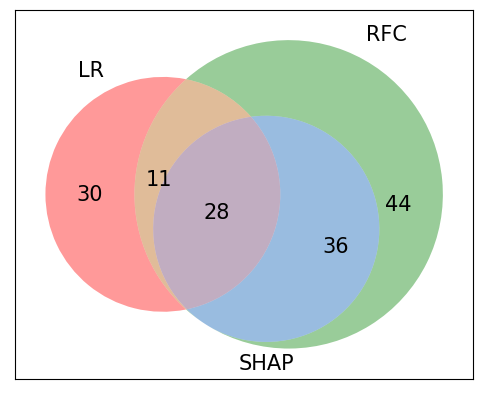

In [23]:
from matplotlib_venn import venn3
out = venn3([lr_set, rfc_set, shap_set], ('LR', 'RFC', 'SHAP'))

for text in out.set_labels:
    text.set_fontsize(15)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(15)

plt.gca().set_axis_on()
plt.savefig("venndiagram.png")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26a52daa-3781-4303-b6d1-419771ff77cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>